<a href="https://colab.research.google.com/github/Geoffrey-lab/Neural_Networks_Hand_Writen_Model/blob/main/Neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import os as os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [6]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [7]:
from keras.src.engine.sequential import input_layer
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0111 - accuracy: 0.9961
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0085 - accuracy: 0.9972
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0088 - accuracy: 0.9972
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0081 - accuracy: 0.9972
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0062 - accuracy: 0.9977


In [16]:
model.save('handwriten.model')

In [17]:
model

In [18]:
loss, accuracy = model.evaluate (X_test, y_test)

print(loss)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1274 - accuracy: 0.9769
0.12735654413700104
0.9768999814987183


In [19]:
model = tf.keras.models.load_model('handwriten.model')

1/1 [==============================] - 0s 20ms/step
Image 1: This pic is probably a 1


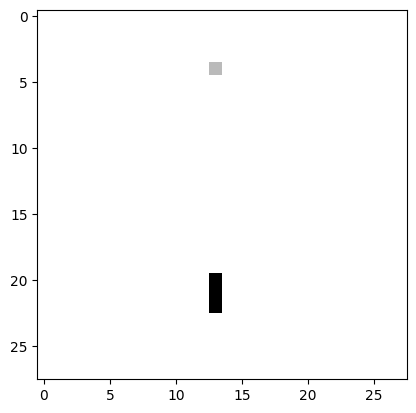

1/1 [==============================] - 0s 20ms/step
Image 2: This pic is probably a 1


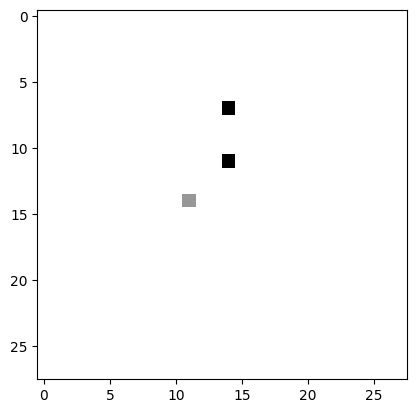

1/1 [==============================] - 0s 20ms/step
Image 3: This pic is probably a 4


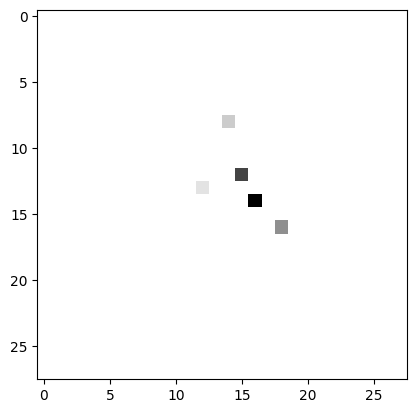

1/1 [==============================] - 0s 19ms/step
Image 4: This pic is probably a 5


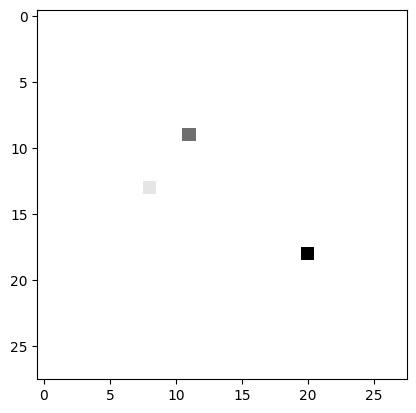

1/1 [==============================] - 0s 20ms/step
Image 5: This pic is probably a 6


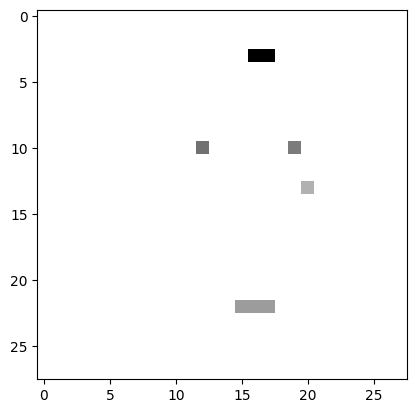

1/1 [==============================] - 0s 20ms/step
Image 6: This pic is probably a 7


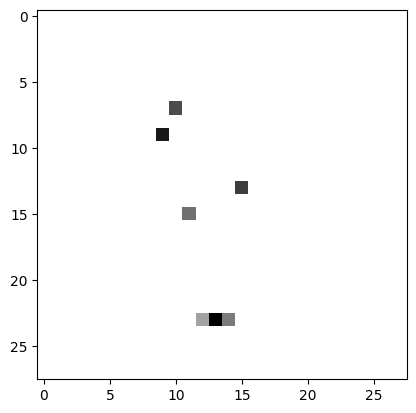

1/1 [==============================] - 0s 20ms/step
Image 7: This pic is probably a 5


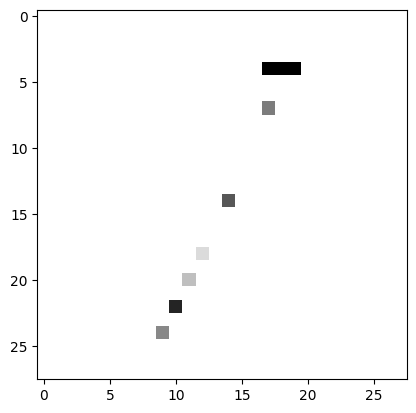

1/1 [==============================] - 0s 20ms/step
Image 8: This pic is probably a 4


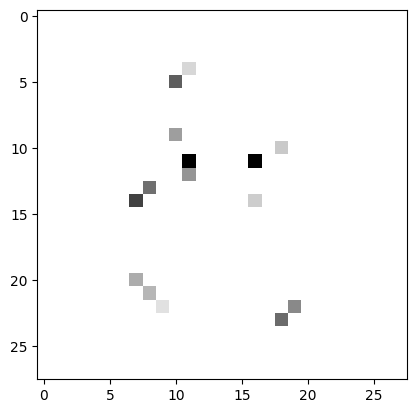

1/1 [==============================] - 0s 21ms/step
Image 9: This pic is probably a 6


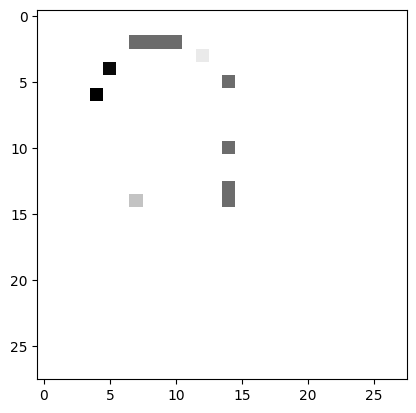

1/1 [==============================] - 0s 19ms/step
Image 10: This pic is probably a 5


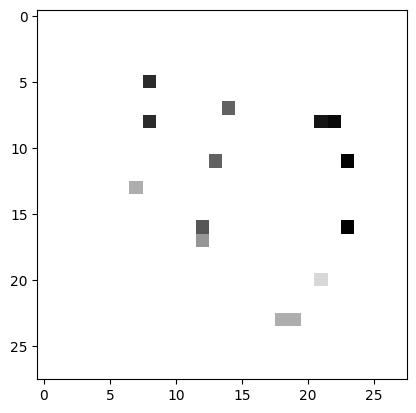

1/1 [==============================] - 0s 22ms/step
Image 11: This pic is probably a 6


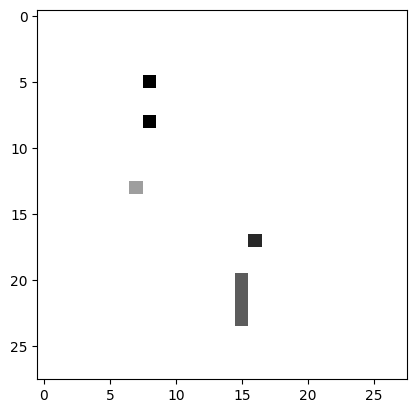

1/1 [==============================] - 0s 26ms/step
Image 12: This pic is probably a 4


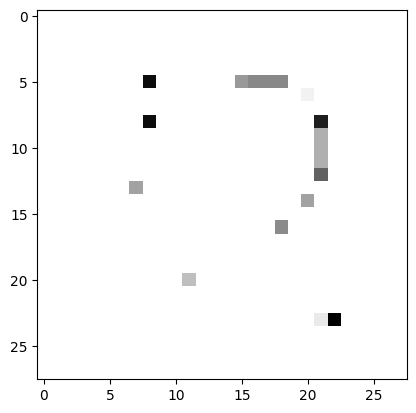

Image 13 does not exist. Exiting loop.


In [23]:
image_number = 1

while True:
  file_path = f"/content/drive/MyDrive/neural_networks/pic{image_number}.png"

  if not os.path.isfile(file_path):
      print(f"Image {image_number} does not exist. Exiting loop.")
      break

  try:
    img = cv2.imread(file_path)[:,:,0]
    img = cv2.resize(img, (28, 28))
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"Image {image_number}: This pic is probably a {np.argmax(prediction)}")
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
  except Exception as e:
    print(f"Error processing image {image_number}: {str(e)}")
  finally:
    image_number += 1
